In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [6]:
car=pd.read_csv('quikr_car.csv')

In [53]:
car.head()

name   company  year   Price  kms_driven fuel_type
0     Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1     Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2       Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3  Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4               Ford Figo      Ford  2012  175000       41000    Diesel

In [8]:
car.shape



(892, 6)

In [9]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [10]:
backup=car.copy()


In [11]:
car=car[car['year'].str.isnumeric()]


In [12]:
car['year']=car['year'].astype(int)


In [13]:
car=car[car['Price']!='Ask For Price']


In [14]:
car['Price']=car['Price'].str.replace(',','').astype(int)


In [15]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')


In [16]:
car=car[car['kms_driven'].str.isnumeric()]


In [17]:
car['kms_driven']=car['kms_driven'].astype(int)


In [18]:
car=car[~car['fuel_type'].isna()]


In [19]:
car.shape


(816, 6)

In [20]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')


In [21]:
car=car.reset_index(drop=True)


In [22]:
car


name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
812          Tata Indica V2      Tata  2009  110000       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
814            Tata Zest XM      Tata  2018  260000       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[816 rows x 6 columns]

In [23]:
car.to_csv('Cleaned_Car_data.csv')


In [24]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [48]:
car.describe(include='all')

name company         year         Price     kms_driven  \
count                   815     815   815.000000  8.150000e+02     815.000000   
unique                  254      25          NaN           NaN            NaN   
top     Maruti Suzuki Swift  Maruti          NaN           NaN            NaN   
freq                     51     221          NaN           NaN            NaN   
mean                    NaN     NaN  2012.442945  4.017933e+05   46277.096933   
std                     NaN     NaN     4.005079  3.815888e+05   34318.459638   
min                     NaN     NaN  1995.000000  3.000000e+04       0.000000   
25%                     NaN     NaN  2010.000000  1.750000e+05   27000.000000   
50%                     NaN     NaN  2013.000000  2.999990e+05   41000.000000   
75%                     NaN     NaN  2015.000000  4.900000e+05   56879.000000   
max                     NaN     NaN  2019.000000  3.100000e+06  400000.000000   

       fuel_type  
count        815  
unique         3  
top       Petrol  
freq         428  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

In [26]:
car=car[car['Price']<6000000]


In [27]:
car['company'].unique()


array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [28]:
import seaborn as sns


C:\Users\sneha\AppData\Local\Temp\ipykernel_3520\2788130517.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


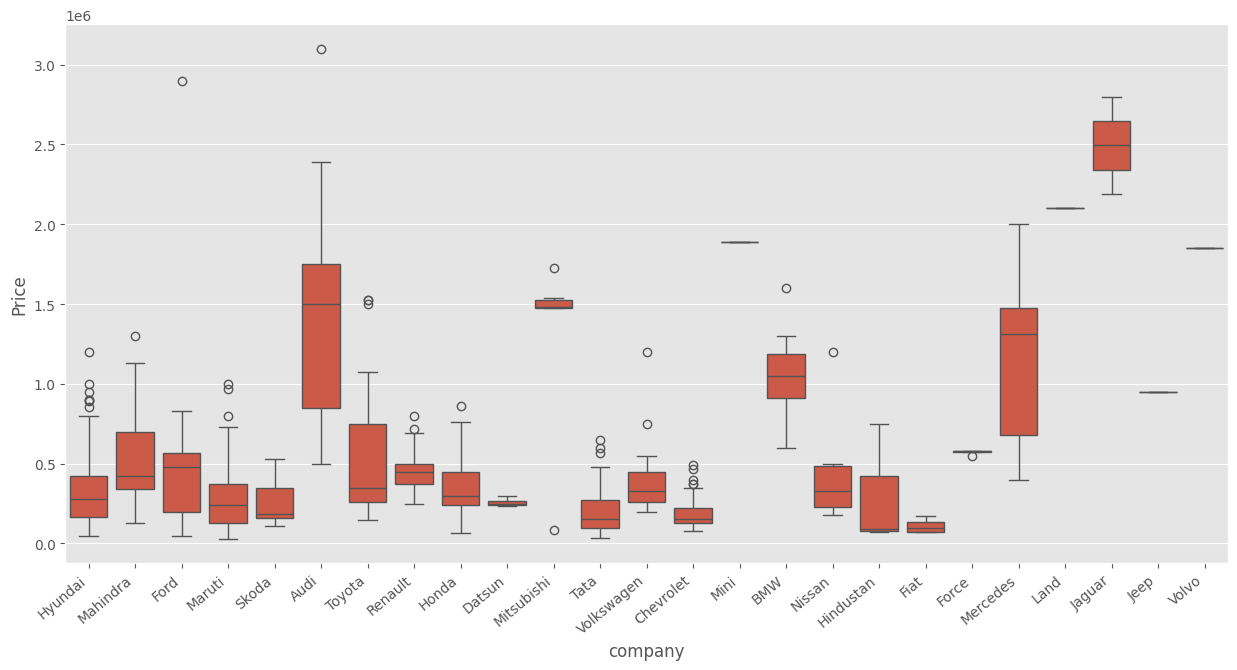

In [29]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

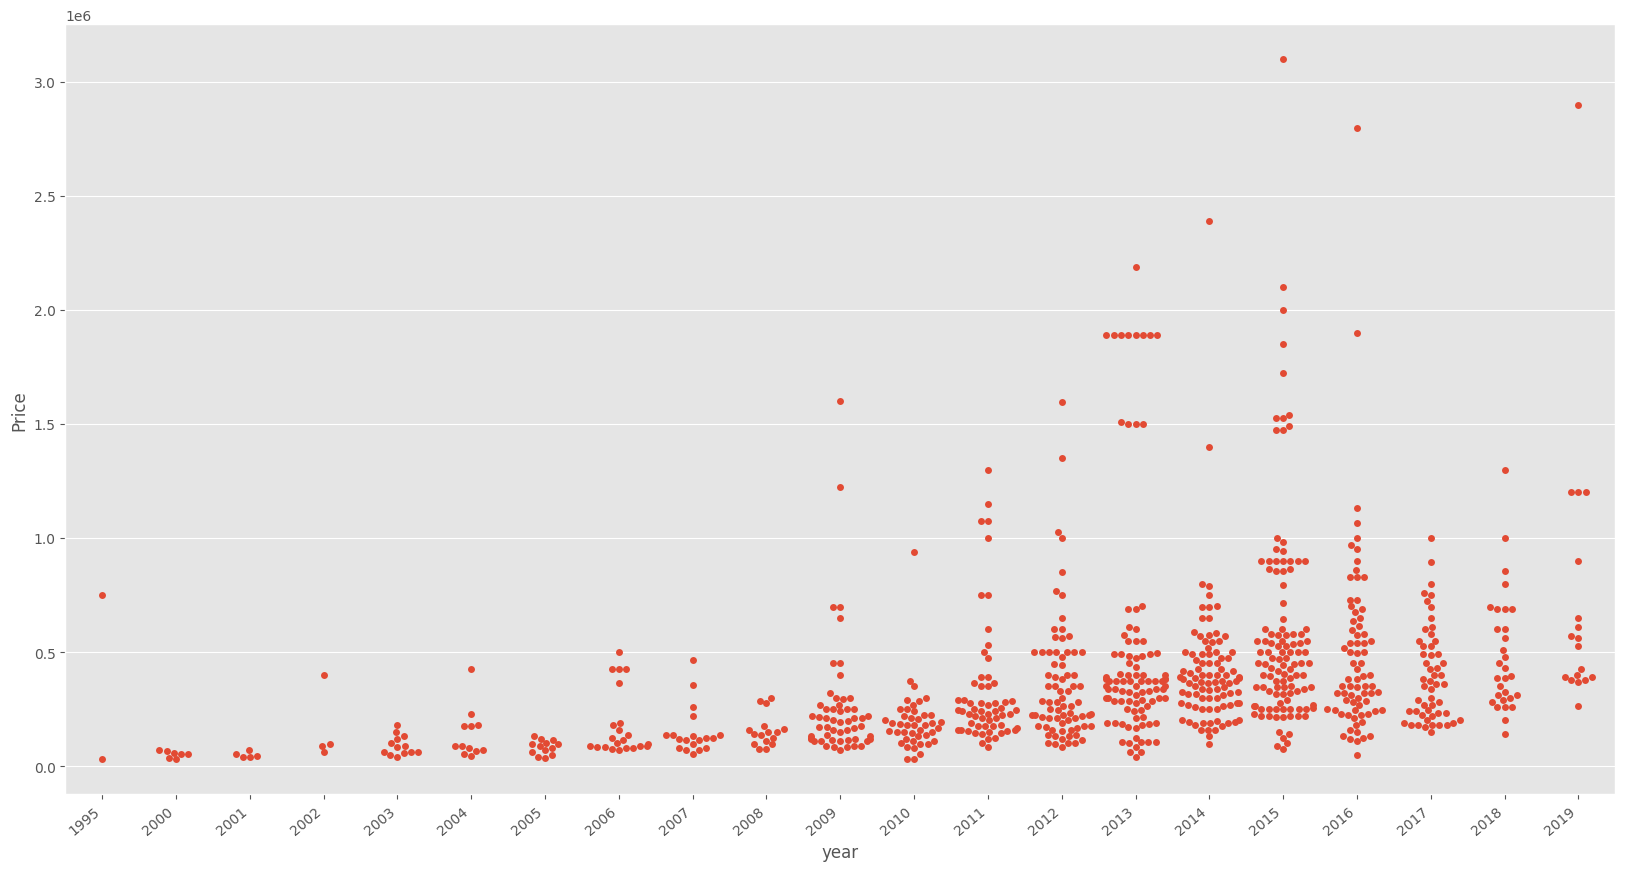

In [30]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

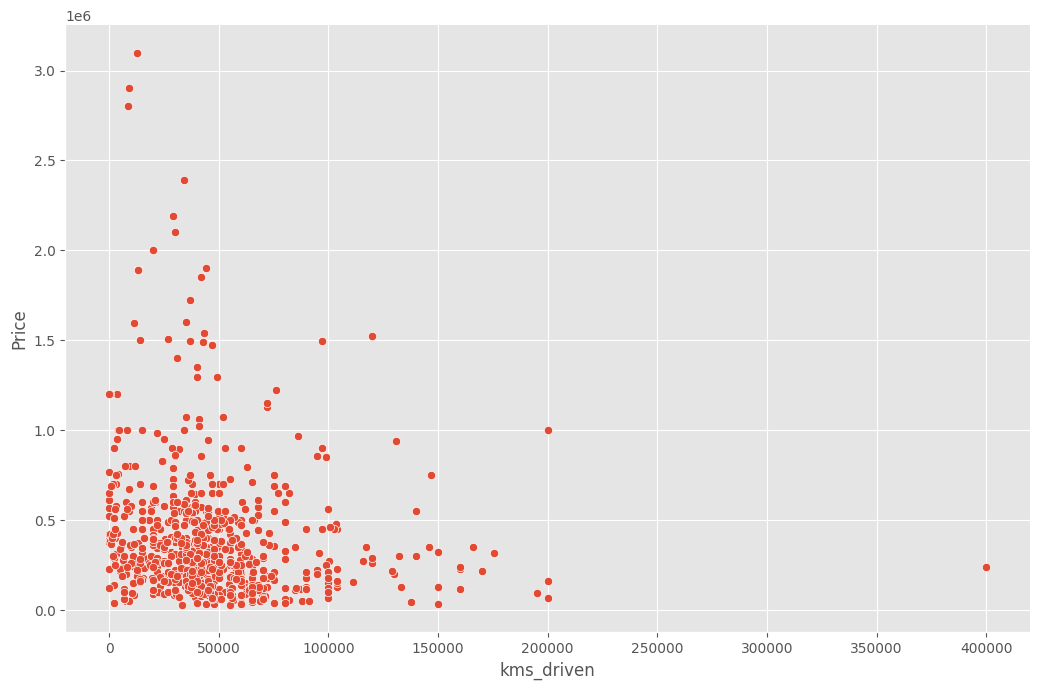

In [31]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)


<Axes: xlabel='fuel_type', ylabel='Price'>

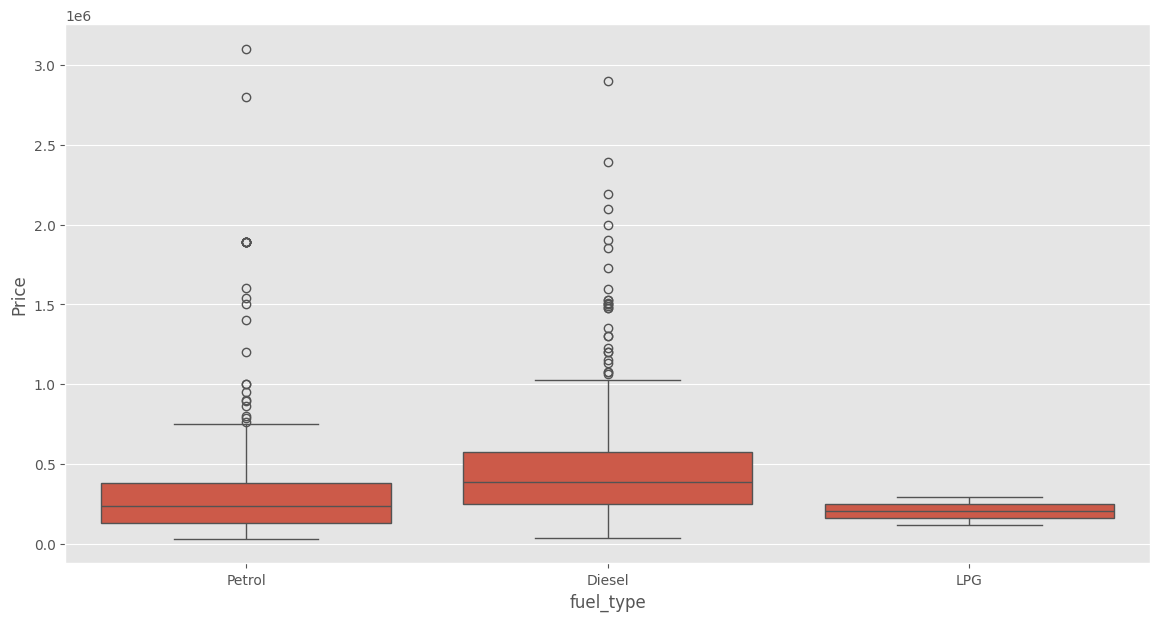

In [32]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

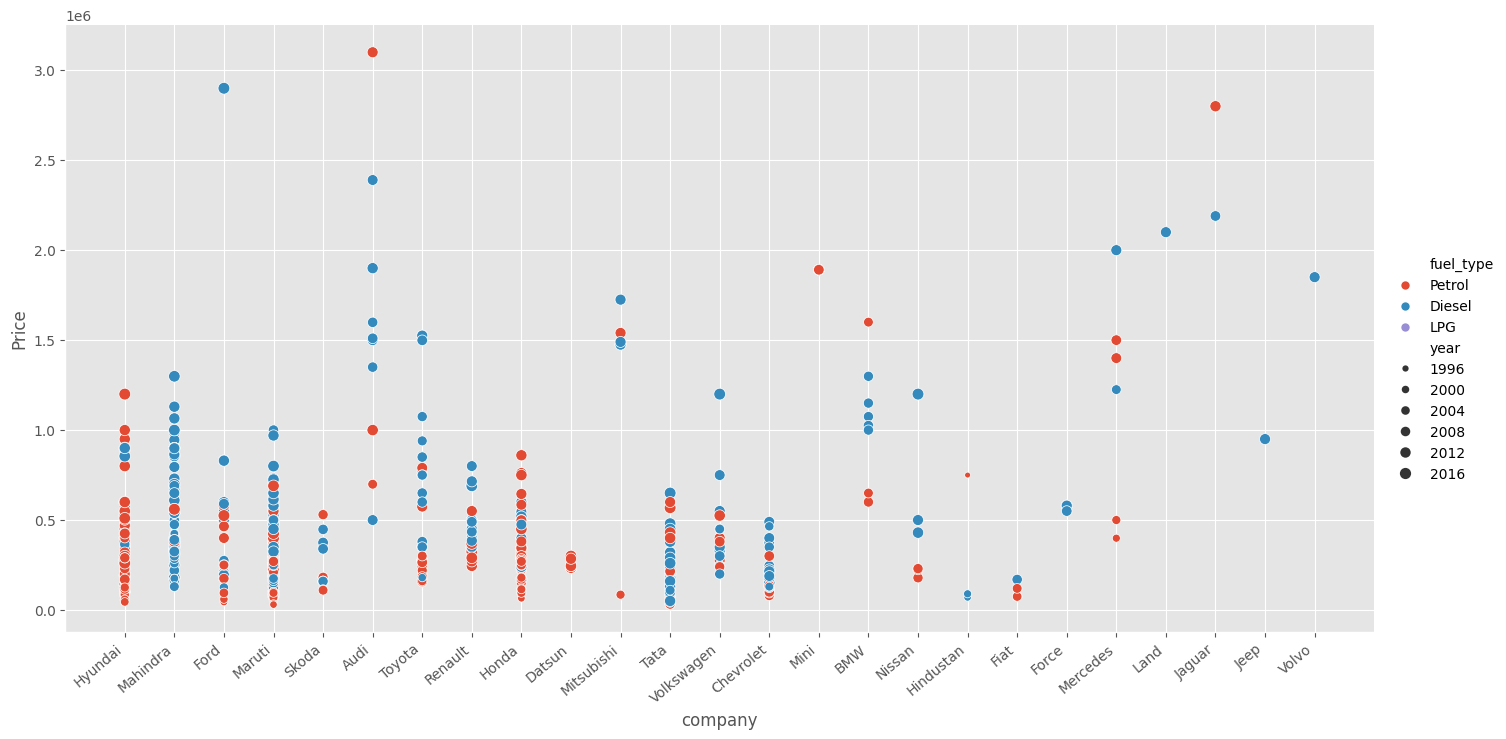

In [33]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [34]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [35]:
X

name   company  year  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006          40    Diesel
2         Hyundai Grand i10   Hyundai  2014       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014       36000    Diesel
4                 Ford Figo      Ford  2012       41000    Diesel
..                      ...       ...   ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011       50000    Petrol
812          Tata Indica V2      Tata  2009       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009      132000    Petrol
814            Tata Zest XM      Tata  2018       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013       40000    Diesel

[815 rows x 5 columns]

In [36]:
y.shape


(815,)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [40]:
ohe = OneHotEncoder(handle_unknown='ignore') 
lr = LinearRegression()

In [41]:
column_trans = ColumnTransformer(
    transformers=[
        ('onehot', ohe, ['name', 'company', 'fuel_type']),
    ],
    remainder='passthrough'
)

In [38]:
lr=LinearRegression()


In [39]:
pipe = make_pipeline(column_trans, lr)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [42]:
y_pred = pipe.predict(X_test)


In [43]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.5731181561740846


In [44]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [45]:
np.argmax(scores)


302

In [46]:
scores[np.argmax(scores)]


0.899111606599091

In [47]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))


array([430233.38517313])

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.899111606599091

In [49]:
import pickle


In [50]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))


In [51]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))


array([456822.45073088])

In [52]:
pipe.steps[0][1].transformers[0][1].categories[0]


'a'

In [53]:
loaded_model = pickle.load(open('LinearRegressionModel.pkl', 'rb'))

In [54]:
car_model = 'Maruti Suzuki Swift'
company = 'Maruti'
year = 2019
driven = 100
fuel_type = 'Petrol'

In [55]:
print("Shape of input data:", np.array([car_model, company, year, driven, fuel_type]).reshape(1, 5).shape)
print("Feature names:", loaded_model.steps[0][1].transformers_[0][1].get_feature_names_out())

Shape of input data: (1, 5)
Feature names: ['name_Audi A3 Cabriolet' 'name_Audi A4 1.8' 'name_Audi A4 2.0'
 'name_Audi A6 2.0' 'name_Audi A8' 'name_Audi Q3 2.0' 'name_Audi Q5 2.0'
 'name_Audi Q7' 'name_BMW 3 Series' 'name_BMW 5 Series'
 'name_BMW 7 Series' 'name_BMW X1 sDrive20d' 'name_BMW X1 xDrive20d'
 'name_Chevrolet Beat Diesel' 'name_Chevrolet Beat LS'
 'name_Chevrolet Beat LT' 'name_Chevrolet Cruze LTZ'
 'name_Chevrolet Enjoy' 'name_Chevrolet Enjoy 1.4'
 'name_Chevrolet Sail 1.2' 'name_Chevrolet Sail UVA'
 'name_Chevrolet Spark 1.0' 'name_Chevrolet Spark LS'
 'name_Chevrolet Spark LT' 'name_Chevrolet Tavera LS'
 'name_Chevrolet Tavera Neo' 'name_Datsun GO T' 'name_Datsun Go Plus'
 'name_Datsun Redi GO' 'name_Fiat Linea Emotion' 'name_Fiat Petra ELX'
 'name_Fiat Punto Emotion' 'name_Force Motors Force'
 'name_Force Motors One' 'name_Ford EcoSport'
 'name_Ford EcoSport Ambiente' 'name_Ford EcoSport Titanium'
 'name_Ford EcoSport Trend' 'name_Ford Endeavor 4x4' 'name_Ford Fiesta'
 '

In [56]:
prediction = loaded_model.predict(pd.DataFrame(columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'],
                                                 data=np.array([car_model, company, year, driven, fuel_type]).reshape(1, 5)))
print("Prediction:", prediction)


Prediction: [456822.45073088]


In [57]:
%pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [58]:
!pip install --upgrade scikit-learn


In [59]:
!pip install --upgrade scikit-learn==0.24.0


  Using cached scikit-learn-0.24.0.tar.gz (7.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [65 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
    

In [60]:
import sklearn
print(sklearn.__version__)


1.3.2


In [61]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [63]:
!pip install --upgrade scikit-learn



In [4]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.
